In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from plotting_utils import *
from ml_utils import *

matplotlib.rcParams['figure.dpi']= 150

colors = sns.color_palette("hls", n_colors=11)

# Heatmap of FC models Performance

layer [4, 8, 16, 32, 64, 128]
node [32, 64, 128, 256, 512, 1024, 2048, 4096, 8192]
input [2000, 8000]
output [200, 1000]
bs [64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
-----------------------


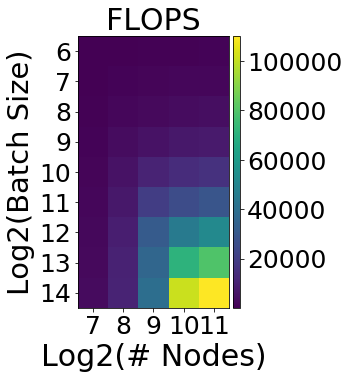

In [2]:
r = {'node':[128, 256, 512, 1024, 2048, 4096, 8192],
     'layer': [64],
     'input':[2000],
     'output':[1000],
     'bs':[64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]}

d = get_data('tpu_fc')
get_range(d['labels'])
d1 = filter_data(r, d)
f = make_heatmap(d1['labels'], d1['flops'],
                dim=['node', 'bs','layer'],
                title=r'FLOPS')

# Linear Regression Weights

/usr/local/lib/python2.7/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


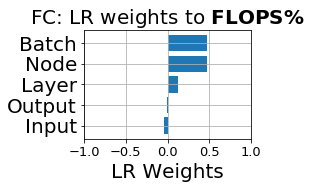

In [3]:
f = regression(d['labels'], d['flops'],
               title = r'FC: LR weights to $\bf{FLOPS\%}$')

# Speedup of TPU over GPU

layer [4, 8, 16, 32, 64, 128]
node [32, 128, 512, 2048, 8192]
input [2000]
output [1000]
bs [64, 128, 256, 512, 1024, 2048, 4096, 8192, 16384]
-----------------------


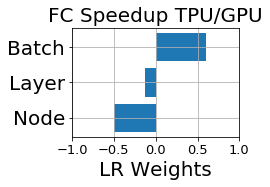

In [4]:
dt = get_data('tpu_fc')
dg = get_data('gpu_fc')
get_range(dg['labels'])

labels, speedups = get_speedup(dt['labels'], dt['example_per_sec'], 
                               dg['labels'], dg['example_per_sec'])
f = regression(labels, speedups, plot=False, order=1, title='FC Speedup TPU/GPU')


length of speedups 61
11.6954645786 0.285889961295
length of speedups 61
11.6954645786 0.285889961295


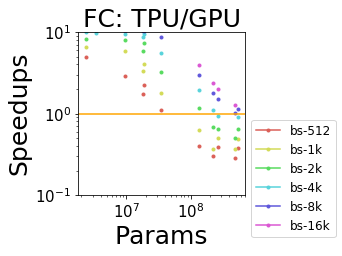

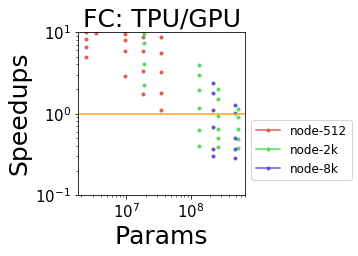

In [5]:
r = {'node':[256, 512, 1024, 2048, 4096, 8192], 'bs':[512, 1024, 2048, 4096, 8192, 16384]}
dt = filter_data(r, dt)
dg = filter_data(r, dg)

f = speedup_params(dt['labels'], dt['example_per_sec'], 
               dg['labels'], dg['example_per_sec'], dg['params'],  marker='.', lim=[0.1, 10],
                   legend_box=(1,0.5),
               color='bs', title= 'FC: TPU/GPU')


f = speedup_params(dt['labels'], dt['example_per_sec'], 
               dg['labels'], dg['example_per_sec'], dg['params'], marker='.', lim=[0.1, 10],
                   legend_box=(1,0.5),
               color='node', title= 'FC: TPU/GPU')
#f.savefig('savedfig/xcompare-fc-speedup_tpu_gpu_node.pdf', bbox_inches='tight')


# Roofline with FC models

layer [4, 8, 16, 32, 64, 128]
node [128, 256, 512, 1024, 2048, 4096, 8192]
input [2000]
output [1000]
bs [256, 512, 1024, 2048, 4096, 8192, 16384]
-----------------------


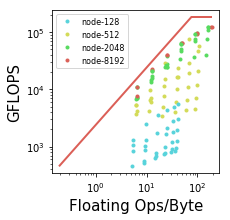

In [6]:
color_dim = 'node'
d = get_data('fc_trace_10sec')
get_range(d['labels'])
d = filter_data({'bs':[512, 1024, 2048, 4096, 8192, 16384], 'node':[128, 512, 2048, 8192]}, d)
f, ax = plt.subplots(figsize=(3,3))
f, ax, m = plot_roofline(f, ax, d, tpu_peak=180e3, membdw_peak=2400, color_dim=color_dim, title='')

# sort the legend
handles, ls = ax.get_legend_handles_labels()
ls = [int(i) for i in ls if i.isdigit()] 
ls, handles = zip(*sorted(zip(ls, handles), key=lambda t: t[0]))
ls = [color_dim + '-' + str(i) for i in ls]
ax.legend(handles, ls, frameon=True, fontsize=8)


layer [4, 8, 16, 32, 64, 128]
node [128, 256, 512, 1024, 2048, 4096, 8192]
input [2000]
output [1000]
bs [256, 512, 1024, 2048, 4096, 8192, 16384]
-----------------------


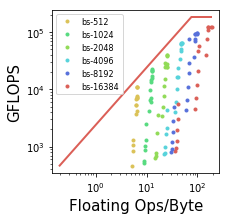

In [7]:
color_dim = 'bs'
d = get_data('fc_trace_10sec')
get_range(d['labels'])
d = filter_data({'bs':[512, 1024, 2048, 4096, 8192, 16384], 'node':[128, 512, 2048, 8192]}, d)
f, ax = plt.subplots(figsize=(3,3))
f, ax, m = plot_roofline(f, ax, d, tpu_peak=180e3, membdw_peak=2400, color_dim=color_dim, title='')

# sort the legend
handles, ls = ax.get_legend_handles_labels()
ls = [int(i) for i in ls if i.isdigit()] 
ls, handles = zip(*sorted(zip(ls, handles), key=lambda t: t[0]))
ls = [color_dim + '-' + str(i) for i in ls]
ax.legend(handles, ls, frameon=True, fontsize=8)


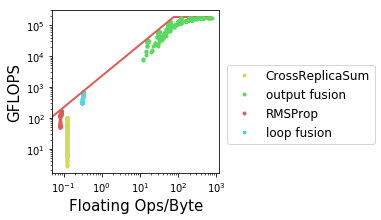

In [8]:
d = get_data('fc_trace_10sec_opbreakdown')
d = remove_while_op(d)
f, ax = plt.subplots(figsize=(3,3))

color_map = {u'cross-replica-sum': (0.8287999999999999, 0.86, 0.33999999999999997), 
             u'output fusion': (0.33999999999999997, 0.86, 0.3712),
             u'matmul': (0.33999999999999997, 0.86, 0.3712),
             u'loop fusion': (0.33999999999999997, 0.8287999999999999, 0.86), 
             u'non-fusion elementwise':  (0.86, 0.3712, 0.33999999999999997)}

f, ax, m = plot_roofline(f, ax, d, tpu_peak=180e3, membdw_peak=2400, color_map=color_map, color_dim='op', thre=1, title='')
m = color_map
mycolors = sns.color_palette("hls", n_colors=len(m)+2)


handles, ls = ax.get_legend_handles_labels()
ls = [i.replace('non-fusion elementwise', 'RMSProp').replace('cross-replica-sum', 'CrossReplicaSum') for i in ls]

ax.legend(handles, ls, frameon=True, fontsize=12, ncol=1, bbox_to_anchor=(1.01,  0.7))
